# **DIGITAL AD CAMPAIGN EFFECTİVENESS**
#### Satış geliri tahmin etme.

In [17]:
#roi = return on investment
import pandas as pd
import numpy as np

# Rastgele veri üretelim (ama gerçekçi aralıklarla)
np.random.seed(42)
df = pd.DataFrame({
    'Google_Ads_Spend': np.random.randint(1000, 5000, 50),
    'Instagram_Ads_Spend': np.random.randint(500, 3000, 50),
    'TikTok_Ads_Spend': np.random.randint(500, 2000, 50),
    'Email_Marketing_Spend': np.random.randint(100, 800, 50)
})

# Satış = her kanalın ağırlıklı etkisi + biraz gürültü
df['Weekly_Sales'] = (
    5
    + 0.003*df['Google_Ads_Spend']
    + 0.005*df['Instagram_Ads_Spend']
    + 0.004*df['TikTok_Ads_Spend']
    + 0.002*df['Email_Marketing_Spend']
    + np.random.normal(0, 1, 50)  # rastgelelik
)

df.head()


,Google_Ads_Spend,Instagram_Ads_Spend,TikTok_Ads_Spend,Email_Marketing_Spend,Weekly_Sales
0,4174,1062,564,195,24.534943
1,4507,2399,1020,584,37.167959
2,1860,1767,1867,506,27.876449
3,2294,2028,1652,330,27.616495
4,2130,1146,1147,754,22.143468


In [2]:
import statsmodels.api as sm

# Bağımsız değişkenler (X) ve bağımlı değişken (y)
X = df[['Google_Ads_Spend', 'Instagram_Ads_Spend', 'TikTok_Ads_Spend', 'Email_Marketing_Spend']]
y = df['Weekly_Sales']

# Sabit terim ekliyoruz (const)
X = sm.add_constant(X)

# Modeli kur
model = sm.OLS(y, X).fit()

# Sonuçları görüntüle
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     531.8
Date:                Cum, 24 Eki 2025   Prob (F-statistic):           3.02e-37
Time:                        02:15:05   Log-Likelihood:                -64.801
No. Observations:                  50   AIC:                             139.6
Df Residuals:                      45   BIC:                             149.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     3.74

In [3]:
print('f_pvalue:', "%.100f" % model.f_pvalue)
print('fvalue:', "%.50f" % model.fvalue)
print('t_value:' '%.2f', model.tvalues[0:1])

f_pvalue: 0.0000000000000000000000000000000000003019713951148691848245826483834376643686148749645892358148249706
fvalue: 531.76869531234592614055145531892776489257812500000000
t_value:%.2f const    5.391933
dtype: float64


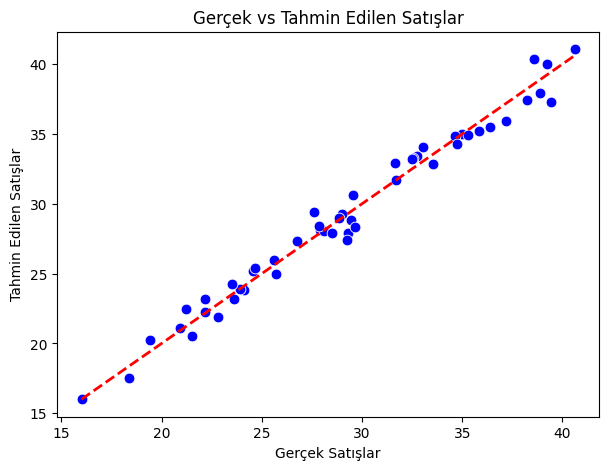

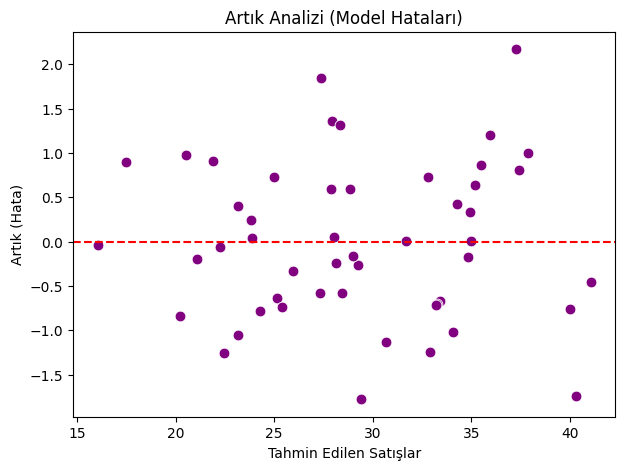

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gerçek ve tahmin edilen değerler
y_pred = model.fittedvalues

#Nokta grafiği: Gerçek vs Tahmin
plt.figure(figsize=(7,5))
sns.scatterplot(x=y, y=y_pred, color='blue', s=60)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # referans doğru çizgisi
plt.xlabel("Gerçek Satışlar")
plt.ylabel("Tahmin Edilen Satışlar")
plt.title("Gerçek vs Tahmin Edilen Satışlar")
plt.show()

# Artık (residual) grafiği: Hatalar nasıl dağılmış?
residuals = y - y_pred
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_pred, y=residuals, color='purple', s=60)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Tahmin Edilen Satışlar")
plt.ylabel("Artık (Hata)")
plt.title("Artık Analizi (Model Hataları)")
plt.show()


In [7]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"RMSE: {rmse:.3f}")
#r2 verinin %98.3'ünü açıklıyor
#p-value çok düşük, model anlamlı
#t-değerleri yüksek, değişkenler anlamlı
#Artık grafiği rastgele dağılmış, model uygun
#RMSE düşük, model iyi performans gösteriyor
#Sonuç olarak, modelimiz dijital reklam harcamalarının satış üzerindeki etkisini başarılı bir şekilde yakalamış görünüyor.
# Modelimiz dijital reklam harcamalarının satış üzerindeki etkisini başarılı bir şekilde yakalamış görünüyor.
# Bu, pazarlama stratejilerini optimize etmek ve bütçeleri daha etkili bir şekilde dağıtmak için değerli bilgiler sağlar.


RMSE: 0.884


In [8]:
roi = model.params[1:]  # sabit hariç katsayılar
harcamalar = df[['Google_Ads_Spend','Instagram_Ads_Spend','TikTok_Ads_Spend','Email_Marketing_Spend']].mean()

roi_table = pd.DataFrame({
    'Ortalama Harcama (TL)': harcamalar,
    '1 TL Başına Satış Artışı': roi,
    'Tahmini Toplam Katkı': roi * harcamalar
})

roi_table.sort_values('Tahmini Toplam Katkı', ascending=False)


,Ortalama Harcama (TL),1 TL Başına Satış Artışı,Tahmini Toplam Katkı
Google_Ads_Spend,3012.02,0.003126,9.414423
Instagram_Ads_Spend,1831.80,0.005047,9.245657
TikTok_Ads_Spend,1240.90,0.004503,5.587598
Email_Marketing_Spend,523.56,0.002447,1.281325


In [9]:
#Yani Google Ads en yüksek katkıyı sağlıyor. Instagram ve TikTok da önemli katkılar sağlıyor. Email Marketing ise en düşük katkıya sahip.
# Bu bilgiler, pazarlama bütçesini optimize etmek ve hangi kanallara daha fazla yatırım yapılması gerektiği konusunda rehberlik sağlar.
#Google Ads > Instagram Ads > TikTok Ads > Email Marketing
#Goodle ads bir tl başına 0.003 tl satış artışı sağlıyor. Instagram ads 0.005 tl satış artışı sağlıyor. TikTok ads 0.004 tl satış artışı sağlıyor. Email marketing 0.002 tl satış artışı sağlıyor.


C:\Users\MSI\AppData\Local\Temp\ipykernel_3108\1479475016.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


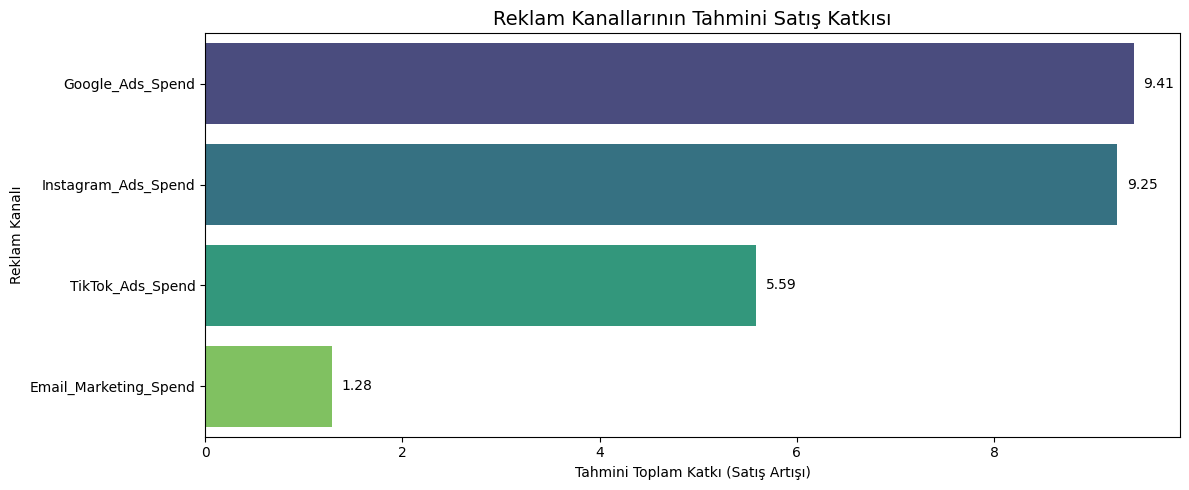

In [13]:
#ROI(Yatırım Getirisi) analizi
import matplotlib.pyplot as plt
import seaborn as sns

# Grafiğe uygun hale getirelim
roi_table_sorted = roi_table.sort_values('Tahmini Toplam Katkı', ascending=False)

plt.figure(figsize=(12,5))
sns.barplot(
    x=roi_table_sorted['Tahmini Toplam Katkı'],
    y=roi_table_sorted.index,
    palette="viridis"
)

plt.title("Reklam Kanallarının Tahmini Satış Katkısı", fontsize=14)
plt.xlabel("Tahmini Toplam Katkı (Satış Artışı)")
plt.ylabel("Reklam Kanalı")

# Her barın ucuna değeri yazdıralım
for index, value in enumerate(roi_table_sorted['Tahmini Toplam Katkı']):
    plt.text(value + 0.1, index, f"{value:.2f}", va='center', fontsize=10)

plt.tight_layout()
plt.show()


In [16]:
#Bütçe optimizasyonu önerisi
# Mevcut bütçeyi en yüksek katkı sağlayan kanallara kaydırmak mantıklı olabilir.
# Örneğin, Google Ads ve Instagram Ads'e daha fazla yatırım yaparken, Email Marketing bütçesini azaltmak düşünülebilir.

# Toplam bütçe (örnek: 10.000 TL)
total_budget = 10000

# ROI oranlarını normalize ederek bütçe paylarını hesapla
weights = roi_table['1 TL Başına Satış Artışı'] / roi_table['1 TL Başına Satış Artışı'].sum()
optimal_allocation = weights * total_budget

# Sonuçları tablo haline getir
allocation_table = pd.DataFrame({
    'Kanal': roi_table.index,
    '1 TL Başına Satış Artışı': roi_table['1 TL Başına Satış Artışı'],
    'Optimum Bütçe (TL)': optimal_allocation.round(2)
}).sort_values('Optimum Bütçe (TL)', ascending=False)

allocation_table

#Görünüşte google en çok satış getiriyor ama bir tl başına roi düşük. Instagram en yüksek roi sağlıyor. TikTok ikinci en yüksek roi sağlıyor. Email marketing en düşük roi sağlıyor.
# Bu nedenle, bütçeyi en yüksek roi sağlayan kanallara kaydırmak daha mantıklı olabilir.
#Ayrıca etki gücü != verimlilik olduğunu unutmayın.
#Örneğin google ads en çok satış getiriyor ama bir tl başına roi düşük. Instagram en yüksek roi sağlıyor. TikTok ikinci en yüksek roi sağlıyor. Email marketing en düşük roi sağlıyor.

# Google → Ferrari: Hızlı ama yakıtı fazla yakıyor.
# Instagram → Tesla: Daha az yakıtla neredeyse aynı hıza ulaşıyor.

,Kanal,1 TL Başına Satış Artışı,Optimum Bütçe (TL)
Instagram_Ads_Spend,Instagram_Ads_Spend,0.005047,3337.48
TikTok_Ads_Spend,TikTok_Ads_Spend,0.004503,2977.47
Google_Ads_Spend,Google_Ads_Spend,0.003126,2066.78
Email_Marketing_Spend,Email_Marketing_Spend,0.002447,1618.27
